In [3]:
import pandas as pd

# Load the dataset (assuming it's a CSV file)
df = pd.read_csv("E:\skill development\cse\data science\sentiment analysis\IMDB Dataset.csv")
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
# Display the first few rows
print(df.head())

# Check dataset structure
print(df.info())

# Check for missing values
print(df.isnull().sum())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


sentiment
positive    25000
negative    25000
Name: count, dtype: int64


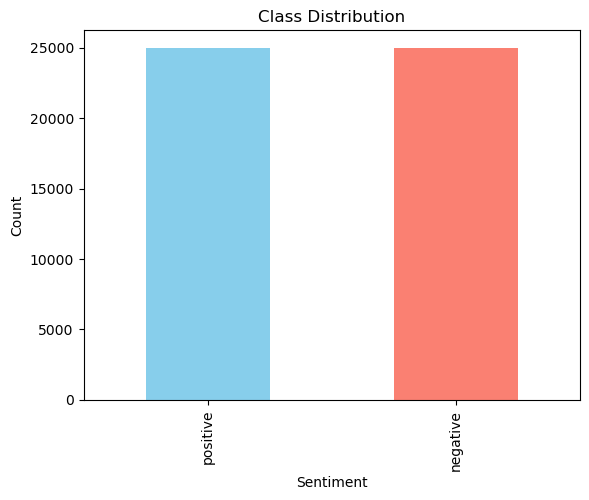

In [5]:
# Check class distribution
print(df['sentiment'].value_counts())

# Visualize class distribution
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [6]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
df['cleaned_text'] = df['review'].apply(clean_text)


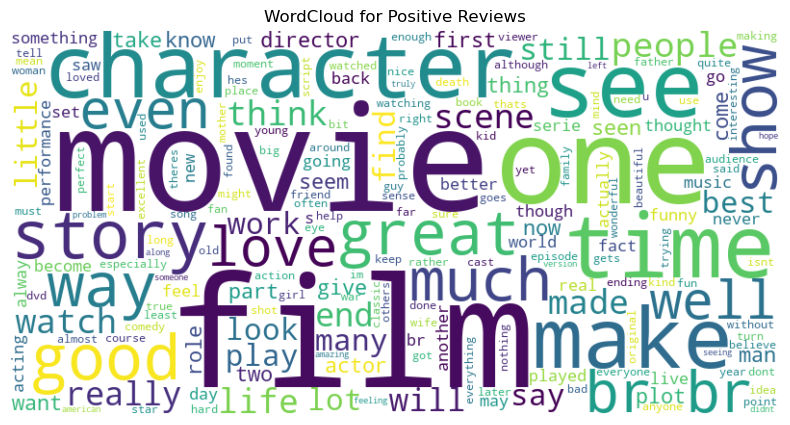

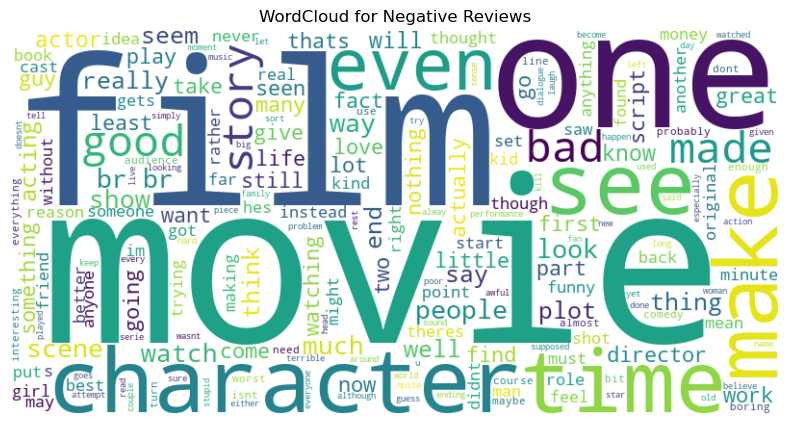

In [12]:

from wordcloud import WordCloud

# WordCloud for positive reviews
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews')
plt.show()

# Repeat for negative reviews
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_text'])
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')
plt.show()


In [13]:
from collections import Counter

# Count most common words in positive reviews
positive_words = Counter(positive_text.split())
print(positive_words.most_common(10))


[('the', 339170), ('and', 174729), ('a', 163137), ('of', 151606), ('to', 130677), ('is', 111407), ('in', 98231), ('it', 76246), ('i', 71746), ('this', 68969)]


In [14]:
# Save the cleaned dataset
df.to_csv('cleaned_imdb_reviews.csv', index=False)
print("Cleaned dataset saved as 'cleaned_imdb_reviews.csv'")


Cleaned dataset saved as 'cleaned_imdb_reviews.csv'


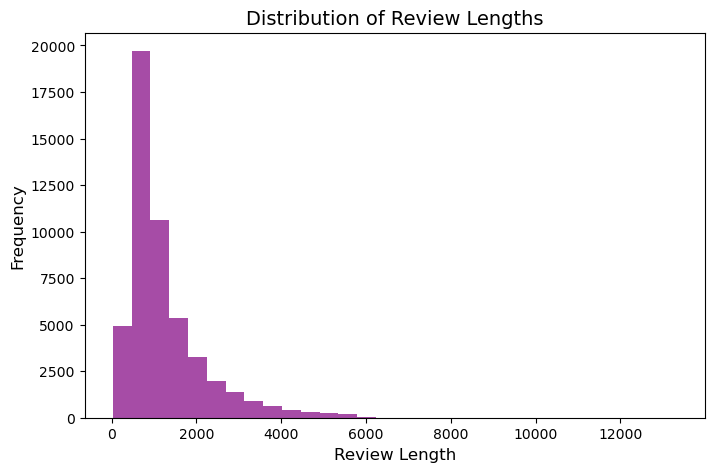

Average review length by sentiment:
sentiment
negative    1234.97940
positive    1267.80732
Name: review_length, dtype: float64


In [16]:
# Add a column for review length
df['review_length'] = df['cleaned_text'].apply(len)

# Plot histogram of review lengths
plt.figure(figsize=(8, 5))
plt.hist(df['review_length'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Review Lengths', fontsize=14)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Average length of positive and negative reviews
avg_length = df.groupby('sentiment')['review_length'].mean()
print("Average review length by sentiment:")
print(avg_length)


### Sentiment Analysis with a Machine Learning Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [18]:
X = df['cleaned_text']  # Features (the review text)
y = df['sentiment']  # Target (the sentiment labels: positive or negative)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [21]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [22]:
y_pred = model.predict(X_test_tfidf)


In [23]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8500
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

